<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Typical Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool 

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 

Target: 
======

In this Implementation , I have

1. Network structure is C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP C10
2. NO of parameters is less than 50,000 ( 41,968)
3. 3 Layers  where the previous image added to the filtered output
4. Batch size  128
5. Group Normalization 



Result: 
======
1. Observed Train accuracy: 71.41%
2. Validation accuracy:75.90%
3. Number of parameters: 41,968


Analysis: 
========

1. The Validation accuracy is good when compared to number of parameters and epoch 
2. The steady increase in the validation accuracy is due to the addition of layers

In [2]:
from model import model1 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (3, 32, 32)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
         Dropout2d-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 32, 34, 34]             512
             ReLU-10           [-1, 32, 34, 34]               0
        GroupNorm-11           [-1, 32, 34, 34]              64
        MaxPool2d-12           [-1, 32, 17, 17]               0
           Conv2d-13           [-1, 16, 17, 17]           4,608
             ReLU-14           [-1, 16,

G:\ERA_S8\model.py:172: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize - Yes that's the only thing i am going to apply on the data for now


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader(batch_size, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Files already downloaded and verified


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [6]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    #scheduler.step()

Currently Executing Epoch: 1


Loss=1.7349151372909546 Batch_id=390 Accuracy=28.45: 100%|███████████████████████████| 391/391 [02:28<00:00,  2.63it/s]



Test set: Average loss: 1.5715, Accuracy: 4131/10000 (41.31%)

Currently Executing Epoch: 2


Loss=1.421375036239624 Batch_id=390 Accuracy=42.71: 100%|████████████████████████████| 391/391 [02:29<00:00,  2.61it/s]



Test set: Average loss: 1.3977, Accuracy: 4744/10000 (47.44%)

Currently Executing Epoch: 3


Loss=1.2610000371932983 Batch_id=390 Accuracy=49.67: 100%|███████████████████████████| 391/391 [02:30<00:00,  2.60it/s]



Test set: Average loss: 1.1948, Accuracy: 5604/10000 (56.04%)

Currently Executing Epoch: 4


Loss=1.1872079372406006 Batch_id=390 Accuracy=54.53: 100%|███████████████████████████| 391/391 [02:31<00:00,  2.57it/s]



Test set: Average loss: 1.0732, Accuracy: 6076/10000 (60.76%)

Currently Executing Epoch: 5


Loss=1.0319759845733643 Batch_id=390 Accuracy=57.68: 100%|███████████████████████████| 391/391 [02:30<00:00,  2.60it/s]



Test set: Average loss: 1.0048, Accuracy: 6354/10000 (63.54%)

Currently Executing Epoch: 6


Loss=1.1731148958206177 Batch_id=390 Accuracy=60.48: 100%|███████████████████████████| 391/391 [02:31<00:00,  2.58it/s]



Test set: Average loss: 0.9551, Accuracy: 6595/10000 (65.95%)

Currently Executing Epoch: 7


Loss=0.8698124885559082 Batch_id=390 Accuracy=62.38: 100%|███████████████████████████| 391/391 [02:30<00:00,  2.59it/s]



Test set: Average loss: 0.9434, Accuracy: 6598/10000 (65.98%)

Currently Executing Epoch: 8


Loss=1.208423137664795 Batch_id=390 Accuracy=63.96: 100%|████████████████████████████| 391/391 [02:31<00:00,  2.58it/s]



Test set: Average loss: 0.9296, Accuracy: 6627/10000 (66.27%)

Currently Executing Epoch: 9


Loss=1.0329262018203735 Batch_id=390 Accuracy=65.17: 100%|███████████████████████████| 391/391 [03:45<00:00,  1.73it/s]



Test set: Average loss: 0.8506, Accuracy: 6929/10000 (69.29%)

Currently Executing Epoch: 10


Loss=1.0113675594329834 Batch_id=390 Accuracy=65.99: 100%|███████████████████████████| 391/391 [04:08<00:00,  1.57it/s]



Test set: Average loss: 0.8249, Accuracy: 7058/10000 (70.58%)

Currently Executing Epoch: 11


Loss=0.8321861028671265 Batch_id=390 Accuracy=66.95: 100%|███████████████████████████| 391/391 [04:03<00:00,  1.60it/s]



Test set: Average loss: 0.7960, Accuracy: 7155/10000 (71.55%)

Currently Executing Epoch: 12


Loss=0.9305117726325989 Batch_id=390 Accuracy=67.86: 100%|███████████████████████████| 391/391 [03:55<00:00,  1.66it/s]



Test set: Average loss: 0.7696, Accuracy: 7296/10000 (72.96%)

Currently Executing Epoch: 13


Loss=0.9814356565475464 Batch_id=390 Accuracy=68.21: 100%|███████████████████████████| 391/391 [03:59<00:00,  1.63it/s]



Test set: Average loss: 0.7838, Accuracy: 7208/10000 (72.08%)

Currently Executing Epoch: 14


Loss=0.7401462197303772 Batch_id=390 Accuracy=68.99: 100%|███████████████████████████| 391/391 [03:57<00:00,  1.65it/s]



Test set: Average loss: 0.7358, Accuracy: 7438/10000 (74.38%)

Currently Executing Epoch: 15


Loss=1.0203640460968018 Batch_id=390 Accuracy=69.68: 100%|███████████████████████████| 391/391 [04:01<00:00,  1.62it/s]



Test set: Average loss: 0.7783, Accuracy: 7249/10000 (72.49%)

Currently Executing Epoch: 16


Loss=0.8291062116622925 Batch_id=390 Accuracy=69.99: 100%|███████████████████████████| 391/391 [03:58<00:00,  1.64it/s]



Test set: Average loss: 0.7570, Accuracy: 7354/10000 (73.54%)

Currently Executing Epoch: 17


Loss=0.8323614001274109 Batch_id=390 Accuracy=70.65: 100%|███████████████████████████| 391/391 [04:01<00:00,  1.62it/s]



Test set: Average loss: 0.7338, Accuracy: 7442/10000 (74.42%)

Currently Executing Epoch: 18


Loss=0.8440529704093933 Batch_id=390 Accuracy=70.75: 100%|███████████████████████████| 391/391 [04:00<00:00,  1.62it/s]



Test set: Average loss: 0.7331, Accuracy: 7431/10000 (74.31%)

Currently Executing Epoch: 19


Loss=0.7253130078315735 Batch_id=390 Accuracy=71.41: 100%|███████████████████████████| 391/391 [04:13<00:00,  1.54it/s]



Test set: Average loss: 0.7018, Accuracy: 7590/10000 (75.90%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

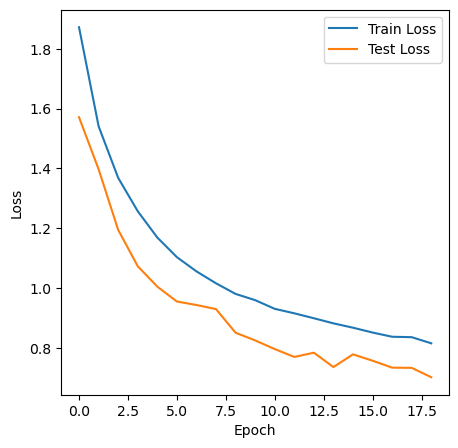

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

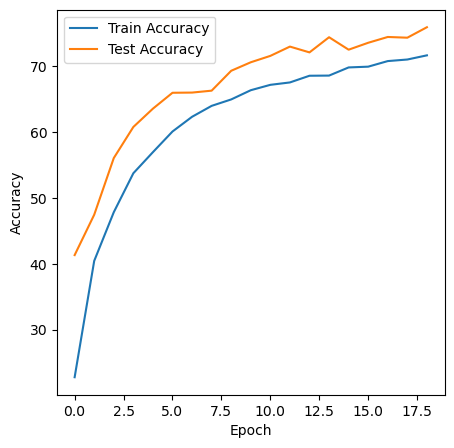

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
